# Medical Appointment dataset investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The medical Appointment dataset contains 110.527 Appointment and it has 14 different variables studying the dataset to show what are the main factors that cause the patient to not show for the Appointment
>
## Resarch Question 
>What days did the patients showed more ?  
what is the average gender of the prople that didnt show ?  
what is the age gender of the people that didnt show ?  
Does reciving an SMS has something to do with Not showing ?  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

<a id='wrangling'></a>
## Data Wrangling
>in this section I will check the datatybe of all the clolums and check if there is any null values or duplicates


### General Properties

In [3]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
for col in df.columns:
    print(f'For column {col}\n------------------\n')
    print(df[col].value_counts())
    print('\n')

For column PatientId
------------------

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
                ..
1.222828e+13     1
6.821231e+11     1
7.163981e+14     1
9.798964e+14     1
2.724571e+11     1
Name: PatientId, Length: 62299, dtype: int64


For column AppointmentID
------------------

5769215    1
5731652    1
5707080    1
5702986    1
5715276    1
          ..
5586290    1
5584243    1
5598584    1
5602682    1
5771266    1
Name: AppointmentID, Length: 110527, dtype: int64


For column Gender
------------------

F    71840
M    38687
Name: Gender, dtype: int64


For column ScheduledDay
------------------

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-06-08T11:47:51Z     1
2016-05-02T08:08:08Z     1
2016-05-12T11:28:47Z     1
2016-05-13T15:35:38Z     1
2016-06-06T08:32:45Z     1
Name: ScheduledDay, Length: 10354

#### we checked if their was any duplicated values or null values and there was none and checked the values count for each row and then the describe of the data showed there is a problem in the age column that it has a value quals to -1 and 115 which could be wrong and the scheduale day and appoitment dat are int Dtype object and it should be datetime 


### Data Cleaning 
>In this section I will handle to problem of outlier in the age column and the datatybe problem 

In [9]:
df[df.Age < 0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df.drop([99832],axis=0, inplace=True)

In [11]:
df[df.Age == 115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [12]:
df.drop([63912],axis=0,inplace=True)
df.drop([63915],axis=0,inplace=True)
df.drop([68127],axis=0,inplace=True)
df.drop([76284],axis=0,inplace=True)
df.drop([97666],axis=0,inplace=True)

After handling the outlier problem now will handle the datatybe problem

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],format="%Y/%m/%d %H:%M:%S")
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
df['Day_Name'] = df['ScheduledDay'].dt.day_name()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_Name
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


Then i will add a cloumn that shows the day of the appoitment to help me more in the investigation 

<a id='eda'></a>
## Exploratory Data Analysis
### What days did the patients showed more ?

In [15]:
df['Day_Name'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23081
Friday       18914
Thursday     18072
Saturday        24
Name: Day_Name, dtype: int64

Text(0.5, 1.0, 'figure to show the average count of people that shown every day of the week')

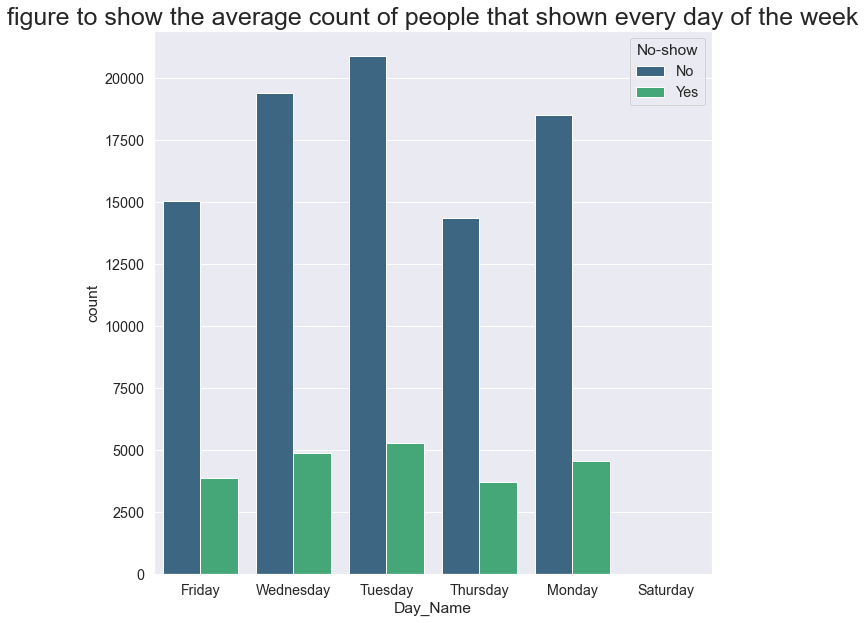

In [29]:
sns.countplot(x='Day_Name', data=df,hue='No-show', palette='viridis').set_title('figure to show the average count of people that shown every day of the week',size=25)

#### As it shows in the graph there is a problem in saturday as it shows a it wasn't show a lot in the data set and in the graph also shows that Tuesday is the most day of people that didn't show 

## what is the average gender of the people that didnt show ?

Text(0.5, 1.0, "figure shows the average gender of people that did'nt show")

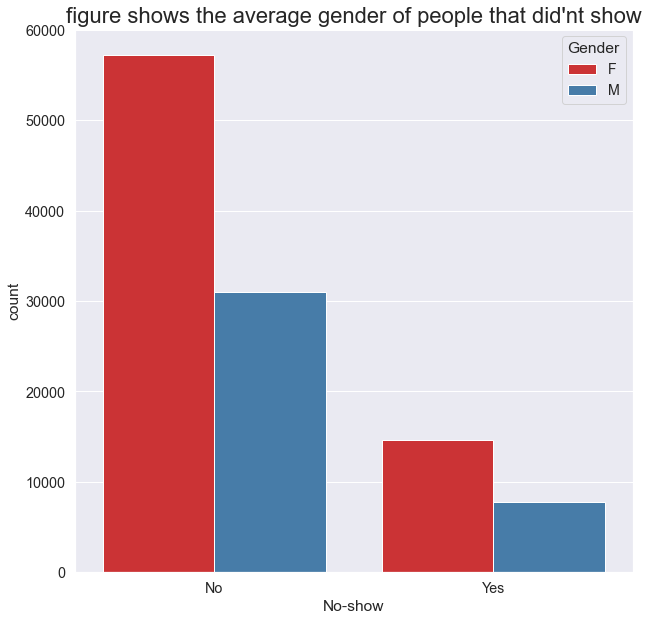

In [37]:
sns.countplot(x='No-show', data=df, hue='Gender', palette='Set1').set_title("figure shows the average gender of people that did'nt show",size=22)

As it show in the graph that Male didnt show more than females

# what is the average age of people that didn't show

Text(0.5, 0.98, "figure that show the average age of people that didn't show")

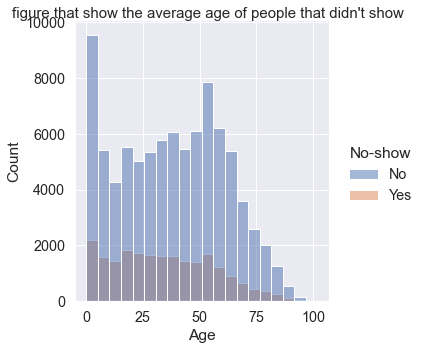

In [41]:
sns.displot(data=df,x=df['Age'],hue='No-show', kde=False, bins=20, color='m').fig.suptitle("figure that show the average age of people that didn't show",size=15)

# Does reciving an SMS has something to do with Not showing ?

Text(0.5, 1.0, 'figure that shows the average people that didnt show and recived an SMS message')

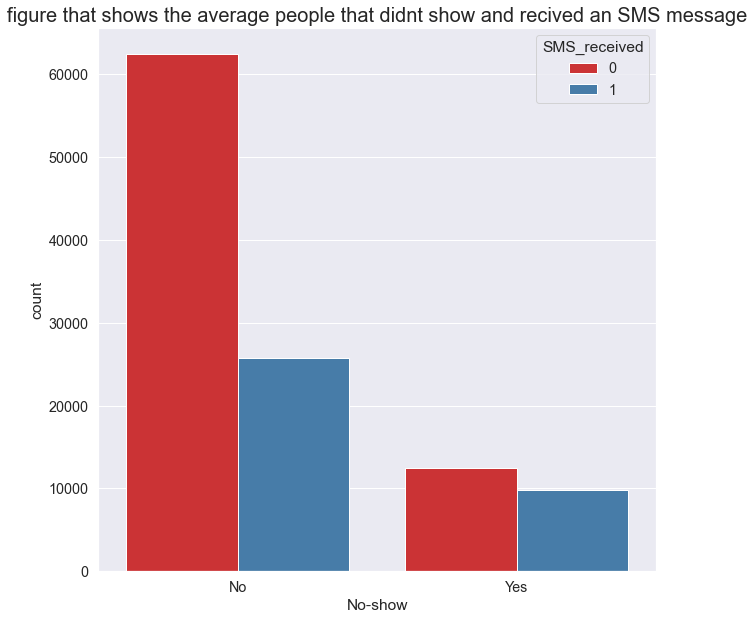

In [36]:
sns.countplot(x='No-show', data=df, hue='SMS_received', palette='Set1').set_title("figure that shows the average people that didnt show and recived an SMS message",size=20)

### As it show there is a little more in the average people that didn't recive an SMS and didn't show 

<a id='conclusions'></a>
## Conclusions

> The analysis Showed there is correlation between the Gender and the average people that didn't show it also showed there is a problem in saturday and also there is a correlation between the age and the average people that didn't show and not reciving an SMS will make the average peoplt to Not show increase a little 
### Limitations 
> -The first Limitation was that the dataset had same data entry proplems like the negative age and the very old people which might affect the ivetigation  
-The other limitations was the lack of informations in the dataset which might help the investigation more fore example adding the cost of the dataset or add the average distance between the hospital and the patient 